## Факторы линейной прогрессии
1. distance
2. departure delay
3. taxi out
4. day of week
5. aircraft max cruise speed
6. bool east to west
7. aircraft age

## Линейная регрессия

In [256]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [311]:
data = read_csv('all_data.csv')

In [312]:
data

,Unnamed: 0,YEAR,MONTH,DAY_OF_MONTH,model,airline,DAY_OF_WEEK,aircraft age,aircraft max cruise speed,FL_DATE,...,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,0,2023,11,1,-,-,3,0,0,11/1/2023 12:00:00 AM,...,1000-1059,1.0,A,0.0,335.0,NaN,NaN,1.0,2398.0,10
1,1,2023,11,1,-,-,3,0,0,11/1/2023 12:00:00 AM,...,2000-2059,1.0,A,0.0,229.0,NaN,NaN,1.0,1325.0,6
2,2,2023,11,1,-,-,3,0,0,11/1/2023 12:00:00 AM,...,2000-2059,1.0,A,0.0,355.0,NaN,NaN,1.0,2419.0,10
3,3,2023,11,1,-,-,3,0,0,11/1/2023 12:00:00 AM,...,1200-1259,1.0,A,0.0,43.0,NaN,NaN,1.0,102.0,1
4,4,2023,11,1,-,-,3,0,0,11/1/2023 12:00:00 AM,...,1300-1359,1.0,A,0.0,40.0,NaN,NaN,1.0,102.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681437,1681437,2024,1,31,A320,Delta Air Lines,3,31,903,1/31/2024 12:00:00 AM,...,1900-1959,0.0,NaN,0.0,156.0,172.0,144.0,1.0,919.0,4
1681438,1681438,2024,1,31,E75L,Alaska SkyWest,3,5,890,1/31/2024 12:00:00 AM,...,2200-2259,0.0,NaN,0.0,188.0,211.0,188.0,1.0,1249.0,5
1681439,1681439,2024,1,31,E75L,Alaska SkyWest,3,5,890,1/31/2024 12:00:00 AM,...,1800-1859,0.0,NaN,0.0,222.0,182.0,159.0,1.0,1249.0,5
1681440,1681440,2024,1,31,E75L,Alaska SkyWest,3,5,890,1/31/2024 12:00:00 AM,...,0900-0959,0.0,NaN,0.0,219.0,206.0,180.0,1.0,1249.0,5


In [313]:
data.drop(["Unnamed: 0", "FL_DATE", 'airline', "TAIL_NUM", 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'longtitude ORIGIN', 'DEST', 'longtitude DEST', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DEL15', 'WHEELS_OFF', 'WHEELS_ON',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'FLIGHTS', 'ACTUAL_ELAPSED_TIME', 'ARR_DEL15','DEP_DELAY_NEW', 'CRS_ELAPSED_TIME', 'DISTANCE_GROUP','TAXI_IN', 'ARR_DELAY', 'ARR_DELAY_NEW' ], axis=1, inplace=True, errors='ignore')

In [314]:
model = LinearRegression()

In [315]:
data.dropna(subset=['AIR_TIME'], inplace=True)

In [316]:
# data = pd.concat([data, pd.get_dummies(data.model)], axis=1)

In [317]:
data.drop(['model'], axis=1, inplace=True)

In [318]:
X, y = data.drop(['AIR_TIME'], axis=1), data.AIR_TIME

In [319]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2)

In [320]:
X_tr.columns

Index(['DAY_OF_WEEK', 'aircraft age', 'aircraft max cruise speed',
       'bool east to west', 'DEP_DELAY', 'TAXI_OUT', 'DISTANCE'],
      dtype='object')

In [321]:
model.fit(X_tr, y_tr)

LinearRegression()

### Коэффициент детерминации

In [322]:
model.score(X_tr, y_tr)

0.9739626392817999

### MAPE

In [323]:
mean_absolute_percentage_error(y_ts, model.predict(X_ts))

0.09050633975932243

### MAE

In [324]:
mean_absolute_error(y_ts, model.predict(X_ts))

8.387584104363983

### MSE

In [325]:
mean_squared_error(y_ts, model.predict(X_ts))

129.8488940922469

In [326]:
model.predict(X_ts)

array([115.59446624, 172.49540168,  76.87504964, ...,  28.03872845,
        55.49952693, 101.3143981 ])

In [295]:
X_tr.columns

Index(['DAY_OF_WEEK', 'aircraft age', 'aircraft max cruise speed',
       'bool east to west', 'DEP_DELAY', 'TAXI_OUT', 'DISTANCE'],
      dtype='object')

In [327]:
model.coef_

array([-7.38527942e-04, -1.47562728e-03, -2.38112519e-04, -1.52643200e+01,
       -1.12640469e-03,  7.88527416e-02,  1.16991232e-01])

### Коэффициенты регрессии

In [328]:
sorted([(c, f) for c,f in zip(X_tr.columns, model.coef_)], key = lambda x: abs(x[1]), reverse=True)

[('bool east to west', -15.264320044718549),
 ('DISTANCE', 0.11699123219523355),
 ('TAXI_OUT', 0.07885274163262194),
 ('aircraft age', -0.0014756272787838642),
 ('DEP_DELAY', -0.0011264046872948065),
 ('DAY_OF_WEEK', -0.000738527941945357),
 ('aircraft max cruise speed', -0.00023811251866337363)]

### Попробуем исключать переменные

#### bool east to west

In [375]:
data_1 = data.drop(['bool east to west'], axis=1)
model_1 = LinearRegression()
X_1, y_1 = data_1.drop(['AIR_TIME'], axis=1), data_1.AIR_TIME

X_tr_1, X_ts_1, y_tr_1, y_ts_1 = train_test_split(X_1, y_1, test_size=0.2)

print('факторы: ', X_tr_1.columns)
model_1.fit(X_tr_1, y_tr_1)

print('коэфф детерминации = ', model_1.score(X_tr_1, y_tr_1))# коэфф детерминации
print('MSE = ', mean_squared_error(y_ts_1, model_1.predict(X_ts_1)))
print('средняя ошибка в минутах = ', mean_absolute_error(y_ts_1, model_1.predict(X_ts_1)))#средняя ошибка в минутах
print('коэффициенты регрессии: ', sorted([(c, f) for c,f in zip(X_tr_1.columns, model_1.coef_)], key = lambda x: abs(x[1]), reverse=True), sep='\n') #коэффициенты регрессии

факторы:  Index(['DAY_OF_WEEK', 'aircraft age', 'aircraft max cruise speed', 'DEP_DELAY',
       'TAXI_OUT', 'DISTANCE'],
      dtype='object')
коэфф детерминации =  0.9622707388207192
MSE =  188.2528075322003
средняя ошибка в минутах =  9.757741786918613
коэффициенты регрессии: 
[('DISTANCE', 0.11664022911539824), ('TAXI_OUT', 0.10183936164714287), ('DAY_OF_WEEK', 0.005808293170114083), ('DEP_DELAY', -0.001045104720761616), ('aircraft age', -0.0009099525959628402), ('aircraft max cruise speed', -0.0005593288031733259)]


#### DISTANCE

In [376]:
data_2 = data.drop(['DISTANCE'], axis=1)
model_2 = LinearRegression()
X_2, y_2 = data_2.drop(['AIR_TIME'], axis=1), data_2.AIR_TIME

X_tr_2, X_ts_2, y_tr_2, y_ts_2 = train_test_split(X_2, y_2, test_size=0.2)

print('факторы: ', X_tr_2.columns)

model_2.fit(X_tr_2, y_tr_2)

print('коэфф детерминации = ', model_2.score(X_tr_2, y_tr_2))# коэфф детерминации
print('MSE = ', mean_squared_error(y_ts_2, model_2.predict(X_ts_2)))

print('средняя ошибка в минутах = ', mean_absolute_error(y_ts_2, model_2.predict(X_ts_2)))#средняя ошибка в минутах
print('коэффициенты регрессии: ', sorted([(c, f) for c,f in zip(X_tr_2.columns, model_2.coef_)], key = lambda x: abs(x[1]), reverse=True), sep='\n') #коэффициенты регрессии

факторы:  Index(['DAY_OF_WEEK', 'aircraft age', 'aircraft max cruise speed',
       'bool east to west', 'DEP_DELAY', 'TAXI_OUT'],
      dtype='object')
коэфф детерминации =  0.009335065117085817
MSE =  4951.95826031008
средняя ошибка в минутах =  53.290845476221236
коэффициенты регрессии: 
[('bool east to west', -11.786022929524796), ('TAXI_OUT', 0.33082910097963003), ('DAY_OF_WEEK', 0.2892619985529199), ('aircraft age', 0.012206144558491392), ('DEP_DELAY', 0.01149681930404912), ('aircraft max cruise speed', -0.010058555788295134)]


#### TAXI_OUT

In [377]:
data_3 = data.drop(['TAXI_OUT'], axis=1)
model_3 = LinearRegression()
X_3, y_3 = data_3.drop(['AIR_TIME'], axis=1), data_3.AIR_TIME

X_tr_3, X_ts_3, y_tr_3, y_ts_3 = train_test_split(X_3, y_3, test_size=0.2)

print('факторы: ', X_tr_3.columns)

model_3.fit(X_tr_3, y_tr_3)

print('коэфф детерминации = ', model_3.score(X_tr_3, y_tr_3))# коэфф детерминации
print('MSE = ', mean_squared_error(y_ts_3, model_3.predict(X_ts_3)))

print('средняя ошибка в минутах = ', mean_absolute_error(y_ts_3, model_3.predict(X_ts_3)))#средняя ошибка в минутах
print('коэффициенты регрессии: ', sorted([(c, f) for c,f in zip(X_tr_3.columns, model_3.coef_)], key = lambda x: abs(x[1]), reverse=True), sep='\n') #коэффициенты регрессии

факторы:  Index(['DAY_OF_WEEK', 'aircraft age', 'aircraft max cruise speed',
       'bool east to west', 'DEP_DELAY', 'DISTANCE'],
      dtype='object')
коэфф детерминации =  0.9738949781685977
MSE =  131.24908211459189
средняя ошибка в минутах =  8.410703940028792
коэффициенты регрессии: 
[('bool east to west', -15.295684864805505), ('DISTANCE', 0.11700121473734468), ('aircraft age', -0.002611185957118997), ('DAY_OF_WEEK', 0.0019937428030717395), ('DEP_DELAY', -0.00043625912382968006), ('aircraft max cruise speed', -0.00022568966594302588)]


#### DAY_OF_WEEK

In [378]:
data_4 = data.drop(['DAY_OF_WEEK'], axis=1)
model_4 = LinearRegression()
X_4, y_4 = data_4.drop(['AIR_TIME'], axis=1), data_4.AIR_TIME

X_tr_4, X_ts_4, y_tr_4, y_ts_4 = train_test_split(X_4, y_4, test_size=0.2)

print('факторы: ', X_tr_4.columns)

model_4.fit(X_tr_4, y_tr_4)

print('коэфф детерминации = ', model_4.score(X_tr_4, y_tr_4))# коэфф детерминации
print('MSE = ', mean_squared_error(y_ts_4, model_4.predict(X_ts_4)))

print('средняя ошибка в минутах = ', mean_absolute_error(y_ts_4, model_4.predict(X_ts_4)))#средняя ошибка в минутах
print('коэффициенты регрессии: ', sorted([(c, f) for c,f in zip(X_tr_4.columns, model_4.coef_)], key = lambda x: abs(x[1]), reverse=True), sep='\n') #коэффициенты регрессии

факторы:  Index(['aircraft age', 'aircraft max cruise speed', 'bool east to west',
       'DEP_DELAY', 'TAXI_OUT', 'DISTANCE'],
      dtype='object')
коэфф детерминации =  0.9740191764303067
MSE =  131.47734378036444
средняя ошибка в минутах =  8.410188165808767
коэффициенты регрессии: 
[('bool east to west', -15.246956973721822), ('DISTANCE', 0.11697400231868807), ('TAXI_OUT', 0.0790913696415042), ('DEP_DELAY', -0.0011513729401747988), ('aircraft age', -0.0006380904340031151), ('aircraft max cruise speed', -0.0005515585405745679)]


#### aircraft age

In [379]:
data_5 = data.drop(['aircraft age'], axis=1)
model_5 = LinearRegression()
X_5, y_5 = data_5.drop(['AIR_TIME'], axis=1), data_5.AIR_TIME

X_tr_5, X_ts_5, y_tr_5, y_ts_5 = train_test_split(X_5, y_5, test_size=0.2)

print('факторы: ', X_tr_5.columns)

model_5.fit(X_tr_5, y_tr_5)

print('коэфф детерминации = ', model_5.score(X_tr_5, y_tr_5))# коэфф детерминации
print('MSE = ', mean_squared_error(y_ts_5, model_5.predict(X_ts_5)))

print('средняя ошибка в минутах = ', mean_absolute_error(y_ts_5, model_5.predict(X_ts_5)))#средняя ошибка в минутах
print('коэффициенты регрессии: ', sorted([(c, f) for c,f in zip(X_tr_5.columns, model_5.coef_)], key = lambda x: abs(x[1]), reverse=True), sep='\n') #коэффициенты регрессии

факторы:  Index(['DAY_OF_WEEK', 'aircraft max cruise speed', 'bool east to west',
       'DEP_DELAY', 'TAXI_OUT', 'DISTANCE'],
      dtype='object')
коэфф детерминации =  0.9739485791783326
MSE =  129.85571235093184
средняя ошибка в минутах =  8.394855807143584
коэффициенты регрессии: 
[('bool east to west', -15.24868195412587), ('DISTANCE', 0.11696765735402553), ('TAXI_OUT', 0.07935082972330638), ('DAY_OF_WEEK', 0.003015048574470215), ('DEP_DELAY', -0.000979203942429145), ('aircraft max cruise speed', -0.0003799306203856184)]


#### aircraft max cruise speed

In [380]:
data_6 = data.drop(['aircraft max cruise speed'], axis=1)
model_6 = LinearRegression()
X_6, y_6 = data_6.drop(['AIR_TIME'], axis=1), data_6.AIR_TIME

X_tr_6, X_ts_6, y_tr_6, y_ts_6 = train_test_split(X_6, y_6, test_size=0.2)

print('факторы: ', X_tr_6.columns)

model_6.fit(X_tr_6, y_tr_6)

print('коэфф детерминации = ', model_6.score(X_tr_6, y_tr_6))# коэфф детерминации
print('MSE = ', mean_squared_error(y_ts_6, model_6.predict(X_ts_6)))

print('средняя ошибка в минутах = ', mean_absolute_error(y_ts_6, model_6.predict(X_ts_6)))#средняя ошибка в минутах
print('коэффициенты регрессии: ', sorted([(c, f) for c,f in zip(X_tr_6.columns, model_6.coef_)], key = lambda x: abs(x[1]), reverse=True), sep='\n') #коэффициенты регрессии

факторы:  Index(['DAY_OF_WEEK', 'aircraft age', 'bool east to west', 'DEP_DELAY',
       'TAXI_OUT', 'DISTANCE'],
      dtype='object')
коэфф детерминации =  0.973931771895748
MSE =  129.9804447926223
средняя ошибка в минутах =  8.394021170829994
коэффициенты регрессии: 
[('bool east to west', -15.252775573445923), ('DISTANCE', 0.11695781601761487), ('TAXI_OUT', 0.07984162660080689), ('DAY_OF_WEEK', 0.002247389360594033), ('aircraft age', -0.0021579624036148076), ('DEP_DELAY', -0.001265682908463635)]


#### DEP_DELAY

In [381]:
data_7 = data.drop(['DEP_DELAY'], axis=1)
model_7 = LinearRegression()
X_7, y_7 = data_7.drop(['AIR_TIME'], axis=1), data_7.AIR_TIME

X_tr_7, X_ts_7, y_tr_7, y_ts_7 = train_test_split(X_7, y_7, test_size=0.2)

print('факторы: ', X_tr_7.columns)

model_7.fit(X_tr_7, y_tr_7)

print('коэфф детерминации = ', model_7.score(X_tr_7, y_tr_7))# коэфф детерминации
print('MSE = ', mean_squared_error(y_ts_7, model_7.predict(X_ts_7)))

print('средняя ошибка в минутах = ', mean_absolute_error(y_ts_7, model_7.predict(X_ts_7)))#средняя ошибка в минутах
print('коэффициенты регрессии: ', sorted([(c, f) for c,f in zip(X_tr_7.columns, model_7.coef_)], key = lambda x: abs(x[1]), reverse=True), sep='\n') #коэффициенты регрессии

факторы:  Index(['DAY_OF_WEEK', 'aircraft age', 'aircraft max cruise speed',
       'bool east to west', 'TAXI_OUT', 'DISTANCE'],
      dtype='object')
коэфф детерминации =  0.9739803973306009
MSE =  130.11766514009093
средняя ошибка в минутах =  8.408967265107984
коэффициенты регрессии: 
[('bool east to west', -15.254316555279738), ('DISTANCE', 0.11697045907920067), ('TAXI_OUT', 0.0783338150455007), ('DAY_OF_WEEK', -0.002879861151512456), ('aircraft age', -0.0017594085538251009), ('aircraft max cruise speed', -0.0002458809582614787)]


### TSNE

In [329]:
from sklearn.manifold import TSNE

In [331]:
X_embedded = TSNE(n_components=2).fit_transform(X[:10000])

In [335]:
X_embedded

array([[-26.049122 , -27.132193 ],
       [-26.813622 ,   4.79043  ],
       [-26.051939 , -27.125933 ],
       ...,
       [ 20.032183 ,  17.15033  ],
       [ -7.5692987,  57.06151  ],
       [-67.41968  , -30.018135 ]], dtype=float32)

In [342]:
import matplotlib.pyplot as plt

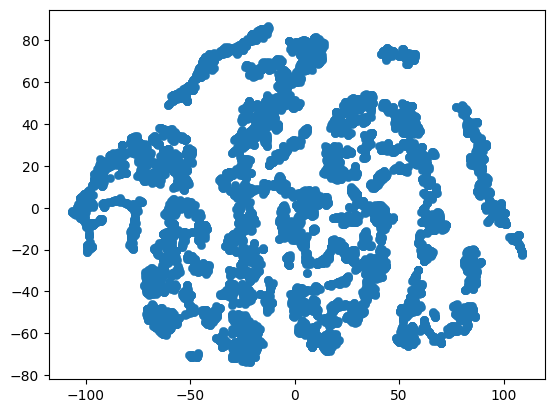

In [341]:
plt.scatter(X_embedded[:,0], X_embedded[:,1],linewidths=0.3 )

## Попытка на катбусте

In [207]:
from catboost import CatBoostRegressor

In [208]:
m = CatBoostRegressor()

In [344]:
all_data = read_csv('all_data.csv')

In [209]:
all_data.drop(["Unnamed: 0", "FL_DATE", 
               "TAIL_NUM", 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'longtitude ORIGIN', 'DEST', 'longtitude DEST', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DEL15', 'WHEELS_OFF', 'WHEELS_ON',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'FLIGHTS', 'ACTUAL_ELAPSED_TIME', 'ARR_DEL15','DEP_DELAY_NEW', 'CRS_ELAPSED_TIME', 'DISTANCE_GROUP','TAXI_IN', 'ARR_DELAY', 'ARR_DELAY_NEW' ], axis=1, inplace=True, errors='ignore')

In [210]:
all_data.dropna(subset=['AIR_TIME'], inplace=True)

In [211]:
X, y = all_data.drop(['AIR_TIME'], axis=1), all_data.AIR_TIME

In [212]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [213]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2)

In [216]:
X_tr.columns

Index(['model', 'airline', 'DAY_OF_WEEK', 'aircraft age',
       'aircraft max cruise speed', 'bool east to west', 'DEP_DELAY',
       'TAXI_OUT', 'DISTANCE'],
      dtype='object')

In [217]:
m.fit(X_tr, y_tr, cat_features=['model', 'airline'])

Learning rate set to 0.127475
0:	learn: 62.3467798	total: 223ms	remaining: 3m 42s
1:	learn: 55.0437011	total: 499ms	remaining: 4m 9s
2:	learn: 48.7462392	total: 771ms	remaining: 4m 16s
3:	learn: 43.2035504	total: 1.02s	remaining: 4m 13s
4:	learn: 38.3942903	total: 1.23s	remaining: 4m 5s
5:	learn: 34.2036976	total: 1.53s	remaining: 4m 13s
6:	learn: 30.5467461	total: 1.81s	remaining: 4m 17s
7:	learn: 27.4237960	total: 2.1s	remaining: 4m 20s
8:	learn: 24.6905564	total: 2.38s	remaining: 4m 22s
9:	learn: 22.3630825	total: 2.66s	remaining: 4m 23s
10:	learn: 20.3426880	total: 2.89s	remaining: 4m 19s
11:	learn: 18.6556807	total: 3.15s	remaining: 4m 19s
12:	learn: 17.2099223	total: 3.33s	remaining: 4m 13s
13:	learn: 15.9862391	total: 3.54s	remaining: 4m 9s
14:	learn: 14.9854281	total: 3.76s	remaining: 4m 6s
15:	learn: 14.1428489	total: 3.97s	remaining: 4m 4s
16:	learn: 13.4567064	total: 4.19s	remaining: 4m 2s
17:	learn: 12.8844580	total: 4.43s	remaining: 4m 1s
18:	learn: 12.4304546	total: 4.67s

In [218]:
mean_absolute_error(y_ts, m.predict(X_ts))

6.626698496367618

In [219]:
mean_absolute_percentage_error(y_ts, m.predict(X_ts))

0.0630065774400957

In [220]:
mean_squared_error(y_ts, m.predict(X_ts))

100.49050936740734

In [221]:
y_ts.mean()

116.00136276420554

In [222]:
m.feature_importances_

array([ 0.20757172,  0.22757457,  0.10652902,  0.4188476 ,  0.1670694 ,
        8.18424741,  0.1724998 ,  0.33590532, 90.17975516])

In [223]:
sorted([(c, f) for c,f in zip(X_tr.columns, m.feature_importances_)], key = lambda x: x[1])

[('DAY_OF_WEEK', 0.10652901661292219),
 ('aircraft max cruise speed', 0.1670694001620425),
 ('DEP_DELAY', 0.17249979748986966),
 ('model', 0.20757172290723103),
 ('airline', 0.22757457308032086),
 ('TAXI_OUT', 0.335905317913186),
 ('aircraft age', 0.4188476003463525),
 ('bool east to west', 8.184247411957447),
 ('DISTANCE', 90.17975515953056)]